### 데이터 분석
1.  데이터 수집: 
 * 기간을 두고 업체/개인 직접 수집, 
 * 데이터를 제공하는 기관으로 부터 받아오기(통계청/공공데이터/기업 open 데이터 등)
 * Open API / 크롤링
 * 파일로 저장/데이터베이스 서버구축 후 저장(오라클DB, MSSQL, MySQL, MariaDB, MongoDB)
2. 저장
 * 저장소에 저장 방법/실시간/시간, 분단위 저장 방법
3. 전처리
 * 분석에 적합한 데이터 구성으로 만듬
4. 분석
 * 다양한 분석 방법을 통해 분석

## 네이버 지식인 검색결과 분석(제주도)

In [1]:
filename = '제주도_지식인.csv'

2. pandas 모듈을 이용해 **데이터** 읽어오기

In [2]:
import pandas as pd

In [3]:
# files 모듈로 업로드한 데이터 가져오기
df = pd.read_csv('제주도_지식인.csv')
df.head(1)

,title,link,description,질문,답변
0,<b>제주도</b> 신혼여행 질문입니다.,https://kin.naver.com/qna/detail.naver?d1id=9&...,... 신혼여행을 5월1일날 <b>제주도</b>로 가게되었는데 그때의 <b>제주도<...,4월에 결혼식을 앞둔 예비신랑입니다. 신혼여행을 5월1일날 제주도로 가게되었는데그때...,건강한 사람이라면 반팔에 바람막이 얇은 옷 하나 들고 가세요접으면 주먹만한 ...


In [4]:
# 구글 드라이브에 있는 데이터 가져오기
df = pd.read_csv(filename)
df.head(1)

,title,link,description,질문,답변
0,<b>제주도</b> 신혼여행 질문입니다.,https://kin.naver.com/qna/detail.naver?d1id=9&...,... 신혼여행을 5월1일날 <b>제주도</b>로 가게되었는데 그때의 <b>제주도<...,4월에 결혼식을 앞둔 예비신랑입니다. 신혼여행을 5월1일날 제주도로 가게되었는데그때...,건강한 사람이라면 반팔에 바람막이 얇은 옷 하나 들고 가세요접으면 주먹만한 ...


3. 데이터 전처리

In [5]:
# df 데이터 구성 요소 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1000 non-null   object
 1   link         1000 non-null   object
 2   description  1000 non-null   object
 3   질문           1000 non-null   object
 4   답변           975 non-null    object
dtypes: object(5)
memory usage: 39.2+ KB


In [6]:
# 불필요한 열 삭제("description")

# 삭제열이 1개 일때
del df['description']   # 실행 즉시 삭제

# 데이터가 많은 경우(loc[], iloc[] 사용)
#df=df.loc[:, ['title','link','질문','답변']]
#df=df.iloc[:, [0, 1, 3, 4]]

In [7]:
# 열 이름 확인
df.columns

Index(['title', 'link', '질문', '답변'], dtype='object')

In [8]:
# 열 이름 변경
df.columns = ['title', 'link', "question", "answer"]
df.columns

Index(['title', 'link', 'question', 'answer'], dtype='object')

### NaN 값 삭제
- DataFrame.dropna( axis=0, how='any', thresh=None, subset=None, inplace=False )
- axis = 0 (row) 혹은 1 (column)
- how = 'any' 일 경우, label 중 하나만 NaN이어도 해당 label을 삭제함.
- how = 'all' 일 경우, label 의 모든 데이터가 NaN이어야 해당 label을 삭제함.
- subset 다른 축(axis)의 어떤 label를 고려해야 하는지 list형태로 지정

In [9]:
# 데이터의 NaN 값 건수 확인
df.isna().sum()

title        0
link         0
question     0
answer      25
dtype: int64

In [10]:
# nan 데이터가 포함되어 있는 행 전체 삭제(df에 적용: df=drop()/df.drop(inplace=True))
df.dropna()    # nan이 1개라도 포함되어 있으면 해당 행 삭제
df.dropna(subset=["answer"])  # answer에 nan이 있으면 행 전체 삭제
df.dropna(axis=1)   # nan이 포함된 열 전체 삭제

,title,link,question
0,<b>제주도</b> 신혼여행 질문입니다.,https://kin.naver.com/qna/detail.naver?d1id=9&...,4월에 결혼식을 앞둔 예비신랑입니다. 신혼여행을 5월1일날 제주도로 가게되었는데그때...
1,<b>제주도</b> 3박4일 여행코스,https://kin.naver.com/qna/detail.naver?d1id=9&...,2월 26일 3박4일로 여자친구랑 제주도 여행을 가려고 하는데 제주도를 많이 가보지...
2,<b>제주도</b> 호텔 숙박,https://kin.naver.com/qna/detail.naver?d1id=9&...,제가 15살인데 제주도로 혼자 2박3일동안 갔다올생각인데 제주도 호텔에서 미성년자가...
3,"<b>제주도</b> 숙소,맛집 추천",https://kin.naver.com/qna/detail.naver?d1id=9&...,제주도에 있는 1박에 30만원 이하인 리조트 추천해주세요.객실도 좋고 조식도 괞잖은...
4,<b>제주도</b> 렌트카,https://kin.naver.com/qna/detail.naver?d1id=12...,이제 갓 면허땃는데 제주도에서 렌트카 빌릴수엤나요
...,...,...,...
995,<b>제주도</b> 가볼곳,https://kin.naver.com/qna/detail.naver?d1id=12...,저가 제주도 2박 3일로 가족끼리 휴가를 가는데요 숙소는 환화리조트이에요 저가 물어...
996,<b>제주도</b> 여행,https://kin.naver.com/qna/detail.naver?d1id=12...,언니랑 단둘이 2박 3일로 제주도 여행을 가게 됐는데 제가 제주도는 처음 가는 거라...
997,<b>제주도</b> 관광정보_ (내공 有),https://kin.naver.com/qna/detail.naver?d1id=9&...,"안녕하세요,, 제가 제주도에 여행을 가게 되는데요 제주도 관광코스, 가는 길( 비행..."
998,<b>제주도</b> 코스 문의,https://kin.naver.com/qna/detail.naver?d1id=9&...,안녕하세요. 질문이있습니다.1월27일 아침 8시 제주도 도착1월29일 아침 9시 제...


### NaN을 다른 데이터로 대체하기
- DataFrame.fillna( value=None, method=None, axis=None, inplace=False, limit=None, downcast=None )
- value = 스칼라, dict, Series, DataFrame 만 넣을 수 있다.

In [11]:
# 특정 필드의 조건을 주어 nan 값 변경(예: 남자(1)/여자(2)에 따라 평균 나이 입력)
# df[df['성별']==1]]["나이"].fillna(df[df['성별']==1]['나이'].mean())

In [12]:
df['answer']=df['answer'].fillna("내용없음") 
df['answer'].fillna("내용없음", inplace=True)  # 입력값으로 nan 값 대체 

In [13]:
df.isna().sum()

title       0
link        0
question    0
answer      0
dtype: int64

title 열의 값을 가져와 형태소 분석 진행

In [14]:
# df['title'] 데이터하나의 데이터(text)로 만들기 
title_txt = ""

for txt in df['title']:
    title_txt += txt + "\n"

#print(title_txt)

In [15]:
# re 모듈과 정규화 표현법을 이용해 필요한 문자만 남기기(나머지 데이터 " "로 변경)
import re

title_txt = re.sub('[^0-9ㄱ-ㅣ가-힣 ]+', ' ', title_txt)
title_txt

' 제주도  신혼여행 질문입니다 제주도  3박4일 여행코스 제주도  호텔 숙박 제주도  숙소 맛집 추천 제주도  렌트카 청주   제주도  우편 보내기  택배  제주도 제주도  음악과 고등학교 구해줘  제주도  가족숙소 대전  제주도  탁송 가격 문의 이번주  제주도 옷차림 제주도  여행 남자 제주도 렌트카 차량별 실시간 제주도  날씨질문 ㅜ 제주도  여행 제주도  여행 시 코로나 검사 해외입국  제주도 까지 제주도  중국인 관광 제주도 와 프랑스의 차이 제주도  지진 제주도  관광 장소 찾아요 1월  제주도  2밥3일 여행 제주도 숙박 싼곳 없을까요 커플 2박 3일  제주도  여행 제주도  벚꽃 개화시기 제주도  여행 관련 질문 2인기준 제주도  관련 질문 입니당 제주도  가족여행 3박4일  4박5일 제주도  숙소 미성년자 제주도  전연령 렌트카 제주도  여행시 음성확인서 군인  제주도  여행 혜택 제주도  갈치조림 맛집 진짜로 제주도  흑돼지 기대중입니다 제주도  청소년 백신패스 제주도  여행 코스 제주도  안 가면 후회되는 곳 제주도  보름살기 숙소 추천 제주도  가볼만한곳 좀 알려주세요 제주도 갈치 찾아야겠어요 제주도 갈치조림 확실하게 제주도  지진 5 3 피해 규모 후기 좋은  제주도 렌트카 어디 제주도 숙박 저렴하게 이용하기 제주도  여행 렌트 백신 미접종  제주도  여행 제주도  맛집 제주도 지도 좀 알려주세요 제주도  호텔취업 질문 제주도  배달 제주도 2박3일여행코스추천 제주도  관광지 추천해주세요 제주도 한달살이 궁금한 것들 제주도  영어학원 제주도 렌트카 궁금합니다 제주도  항공권 예약 할려고 해여 제주도 일정 제주도  도민이 소개하는 맛집 초보운전인데  제주도 제주도 로 이사가는데 제주도  갈만한곳  맛집 제주도 렌트카 차량별 할인 강아지  제주도 제주도  여행 질문이요 제주도  호텔 추천받고싶어요 제주도 렌트카 고등학생  제주도 제주도  여행지 여자 혼자  제주도  2주 여행하기 제주도  신혼여행 호텔 어떻게할까요 제주도  영어회화 학원 

형태소 분석

In [16]:
# konlpy 설치
# !pip install konlpy

In [17]:
from konlpy.tag import Okt
import nltk
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family = "AppleGothic")

In [18]:
okt = Okt()
title_nouns = okt.nouns(title_txt)
len(title_nouns)

3105

In [19]:
# 고유단어 확인
len(set(title_nouns))

494

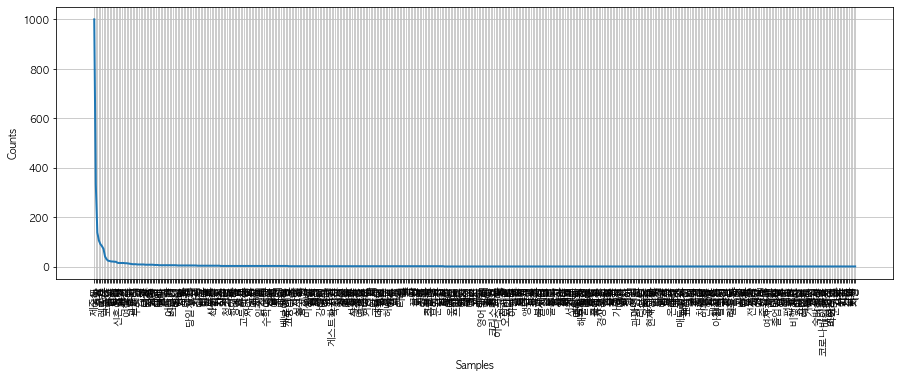

In [20]:
# 텍스트에 대한 시각화
title_plot = nltk.Text(title_nouns)
plt.figure(figsize=(15, 5))
title_plot.plot()
plt.show()

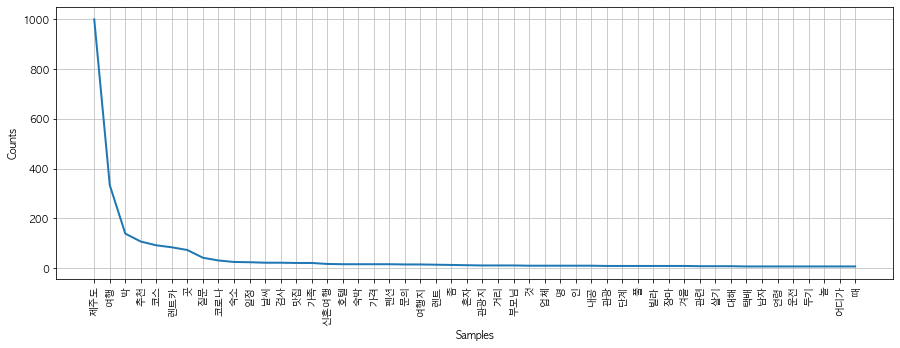

In [21]:
# 텍스트에 대한 시각화(상위 50개만 출력)
title_plot = nltk.Text(title_nouns)
plt.figure(figsize=(15, 5))
title_plot.plot(50)
plt.show()

In [22]:
from collections import Counter   # jdk에서 제공해주는 라이브러리

title_cnt = Counter(title_nouns)   # 데이터의 원소 단위로 빈도수 계산, 딕셔너리 형식으로 제공
title_cnt

Counter({'제주도': 1000,
         '신혼여행': 16,
         '질문': 41,
         '박': 138,
         '여행': 333,
         '코스': 91,
         '호텔': 15,
         '숙박': 15,
         '숙소': 24,
         '맛집': 20,
         '추천': 106,
         '렌트카': 83,
         '청주': 1,
         '우편': 1,
         '택배': 6,
         '음악': 1,
         '고등학교': 2,
         '구': 2,
         '가족': 20,
         '대전': 1,
         '탁송': 2,
         '가격': 15,
         '문의': 14,
         '이번': 1,
         '주': 2,
         '옷차림': 1,
         '남자': 6,
         '차량': 2,
         '별': 2,
         '실시간': 2,
         '날씨': 21,
         '시': 2,
         '코로나': 30,
         '검사': 21,
         '해외': 1,
         '입국': 1,
         '중국인': 2,
         '관광': 8,
         '프랑스': 1,
         '차이': 1,
         '지진': 3,
         '장소': 3,
         '밥': 2,
         '곳': 72,
         '커플': 3,
         '벚꽃': 1,
         '개화': 1,
         '시기': 2,
         '관련': 7,
         '인기': 1,
         '준': 2,
         '미성년': 2,
         '연령': 6,
         '행시': 1,


단어 빈도수가 10건 이하인 데이터 제거

In [23]:
# 딕셔너리 구조를 튜플 구조로 변경(예: (key, value))
title_tu =  title_cnt.most_common()
title_tu[:5]

[('제주도', 1000), ('여행', 333), ('박', 138), ('추천', 106), ('코스', 91)]

In [24]:
#title_rev = []
#for (key, num) in title_tu:
#    if num >= 10:
#        title_rev.append((key, num))

title_rev = [ (key, num) for (key, num) in title_tu if num >= 5 and key != "제주도"]
title_rev[:10]

[('여행', 333),
 ('박', 138),
 ('추천', 106),
 ('코스', 91),
 ('렌트카', 83),
 ('곳', 72),
 ('질문', 41),
 ('코로나', 30),
 ('숙소', 24),
 ('일정', 23)]

워드클라우드를 통해 시각화

In [ ]:
# !pip install WordCloud

In [33]:
from wordcloud import WordCloud as WC
import matplotlib.pyplot as plt

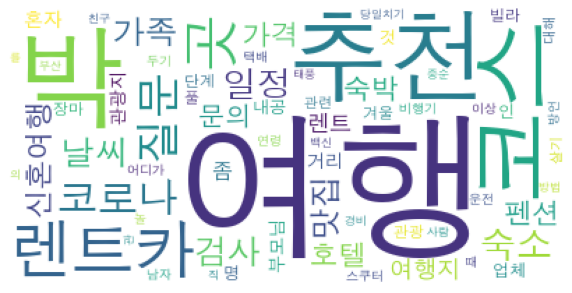

In [34]:
## title을 이용해 워드클라우드 생성
## 워드클라우드의 데이터는 딕셔너리 구조의 데이터야 함({"단어":빈도수})

wc_data=dict(title_rev)
wc1 = WC(font_path='AppleGothic', background_color='white')
wc2 = wc1.generate_from_frequencies(wc_data)

plt.figure(figsize=(10, 10))
plt.imshow(wc2)   # 워드클라우드 이미지 생성
plt.axis('Off')   # 눈금선 제거
plt.show()